# Hotel Dataset Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("../data/hotel_bookings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

First step is separating out the training and test data, and obviously not using the test data. Here's the process:

1. Define an `arrival_date` column from `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`
2. Define a `departure_date` from `stays_in_week_nights` and `stays_in_weekend_nights`
3. Drop `is_canceled` rows
4. Create the full table somehow tbd


In [2]:
pd.set_option("display.max_columns", 35)
df.sample(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
32562,Resort Hotel,0,0,2017,January,5,29,1,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,65.00,0,0,Check-Out,2017-01-30
29086,Resort Hotel,0,219,2016,October,43,16,2,2,2,0.0,0,HB,ITA,Groups,Corporate,0,0,0,E,D,0,No Deposit,NaN,NaN,0,Transient-Party,81.00,0,0,Check-Out,2016-10-20
15243,Resort Hotel,0,1,2017,May,20,16,0,3,2,0.0,0,BB,PRT,Direct,Direct,1,0,1,A,C,0,No Deposit,NaN,NaN,0,Transient,90.25,0,2,Check-Out,2017-05-19
108720,City Hotel,0,88,2017,March,13,31,0,1,2,0.0,0,BB,USA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,88.20,0,1,Check-Out,2017-04-01
49931,City Hotel,1,2,2016,April,17,21,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,1,No Deposit,NaN,51.0,0,Transient,99.00,0,0,Canceled,2016-04-19
97129,City Hotel,0,16,2016,September,38,12,1,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2016-09-13
31170,Resort Hotel,0,101,2016,December,51,15,0,2,1,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,241.0,NaN,0,Transient,25.64,0,3,Check-Out,2016-12-17
25027,Resort Hotel,0,94,2016,June,24,10,0,2,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,6,No Deposit,240.0,NaN,0,Transient-Party,163.00,1,0,Check-Out,2016-06-12
9727,Resort Hotel,1,31,2016,December,53,30,0,2,2,0.0,0,Undefined,PRT,Groups,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient-Party,340.00,0,1,Canceled,2016-12-30
85331,City Hotel,0,47,2016,March,11,9,0,4,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,65.00,0,1,Check-Out,2016-03-13


In [6]:
df["arrival_date"] = pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str) + df.arrival_date_day_of_month.astype(str), format="%Y%B%d")
arrival_cols = [col for col in df.columns if col.startswith("arrival")]
df[arrival_cols].sample(20)

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,arrival_date
60670,2016,November,47,18,2016-11-18
118579,2017,August,33,19,2017-08-19
33717,2017,February,9,28,2017-02-28
108572,2017,March,12,25,2017-03-25
95028,2016,August,33,13,2016-08-13
2864,2015,November,45,3,2015-11-03
39652,2017,August,34,22,2017-08-22
79029,2015,November,45,5,2015-11-05
60281,2016,November,46,7,2016-11-07
73091,2017,August,33,14,2017-08-14


In [5]:
df["stay_length"] = df.stays_in_week_nights + df.stays_in_weekend_nights
df.stay_length.value_counts(dropna=False, normalize=True).sort_index()

0     0.005989
1     0.176062
2     0.231535
3     0.226786
4     0.145598
5     0.065198
6     0.032306
7     0.072494
8     0.009724
9     0.007044
10    0.009540
11    0.003317
12    0.001868
13    0.001189
14    0.007672
15    0.000628
16    0.000335
17    0.000168
18    0.000293
19    0.000184
20    0.000117
21    0.000595
22    0.000117
23    0.000067
24    0.000050
25    0.000310
26    0.000050
27    0.000042
28    0.000293
29    0.000117
30    0.000109
33    0.000025
34    0.000008
35    0.000042
38    0.000008
42    0.000034
43    0.000008
45    0.000008
46    0.000008
48    0.000008
49    0.000008
56    0.000017
57    0.000008
60    0.000008
69    0.000008
Name: stay_length, dtype: float64

In [6]:
df_ = df[df.is_canceled == 0].copy()

departure_dates = df_.arrival_date + pd.to_timedelta(df_.stay_length, "days")
max(departure_dates)

Timestamp('2017-09-14 00:00:00')

In [7]:
# By far the most efficient way to do this
all_dates = pd.date_range(min(df_.arrival_date), "2017-09-13")
ts = pd.DataFrame(0, index=all_dates, columns=df_.hotel.unique())
for idx in ts.index:
    # Add them if they were checked in on or before this date...
    ts.loc[idx] += df_[df_.arrival_date <= idx].groupby("hotel")["is_canceled"].count()

    # Subtract them if they had departed on or before this date...
    ts.loc[idx] -= df_[departure_dates <= idx].groupby("hotel")["is_canceled"].count()



<AxesSubplot:>

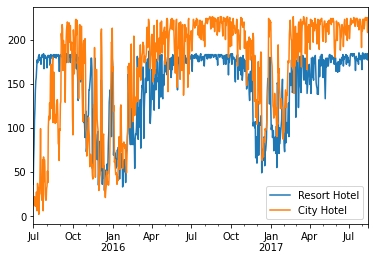

In [8]:
# Plot - But not last 30 days!!
ts.iloc[:-30].plot()

In [10]:
ts.head()

,Resort Hotel,City Hotel
2015-07-01,36,NaN
2015-07-02,64,NaN
2015-07-03,81,13.0
2015-07-04,108,22.0
2015-07-05,122,12.0


In [11]:
ts.isna().sum()

Resort Hotel    0
City Hotel      2
dtype: int64

In [13]:
ts.iloc[:-30].to_csv("../data/train.csv")
ts.iloc[-30:].to_csv("../data/test.csv")